In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

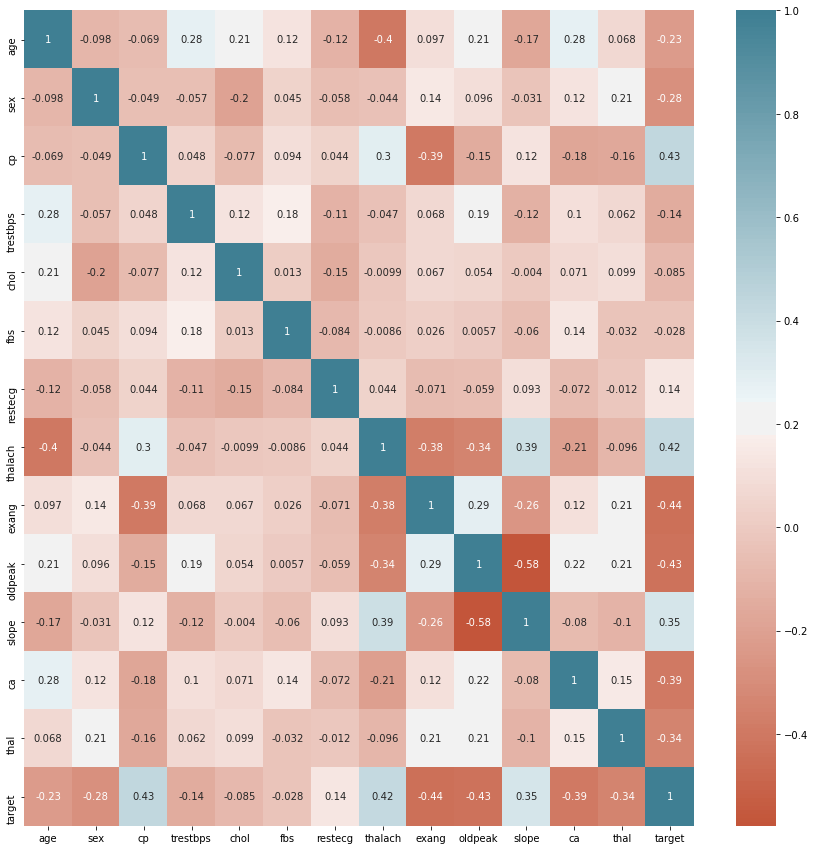

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = sns.diverging_palette(20, 220, n=200))

In [53]:
x = df.drop(['target','chol','fbs','trestbps','restecg','age','sex'],axis=1)
y = df['target']
x

,cp,thalach,exang,oldpeak,slope,ca,thal
0,3,150,0,2.3,0,0,1
1,2,187,0,3.5,0,0,2
2,1,172,0,1.4,2,0,2
3,1,178,0,0.8,2,0,2
4,0,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...
298,0,123,1,0.2,1,0,3
299,3,132,0,1.2,1,0,3
300,0,141,0,3.4,1,2,3
301,0,115,1,1.2,1,1,3


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [55]:
from sklearn.tree import DecisionTreeClassifier
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train) 

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Training Score 0.7768595041322314
Testing Score 0.6885245901639344


In [56]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Training Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Training Score 0.8801652892561983
Testing Score 0.7868852459016393


In [57]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Training Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Training Score 0.9421487603305785
Testing Score 0.819672131147541


In [58]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Training Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

Training Score 0.9793388429752066
Testing Score 0.7868852459016393


In [59]:
dt = DecisionTreeClassifier(max_depth=4,criterion='entropy')

dt.fit(x_train,y_train)

y_pred_dt = dt.predict_proba(x_test)[:,1]
# y_pred_dt

dt_score_train = dt.score(x_train,y_train)
print(dt_score_train)

dt_score_test = dt.score(x_test,y_test)
print(dt_score_test)

0.8760330578512396
0.819672131147541


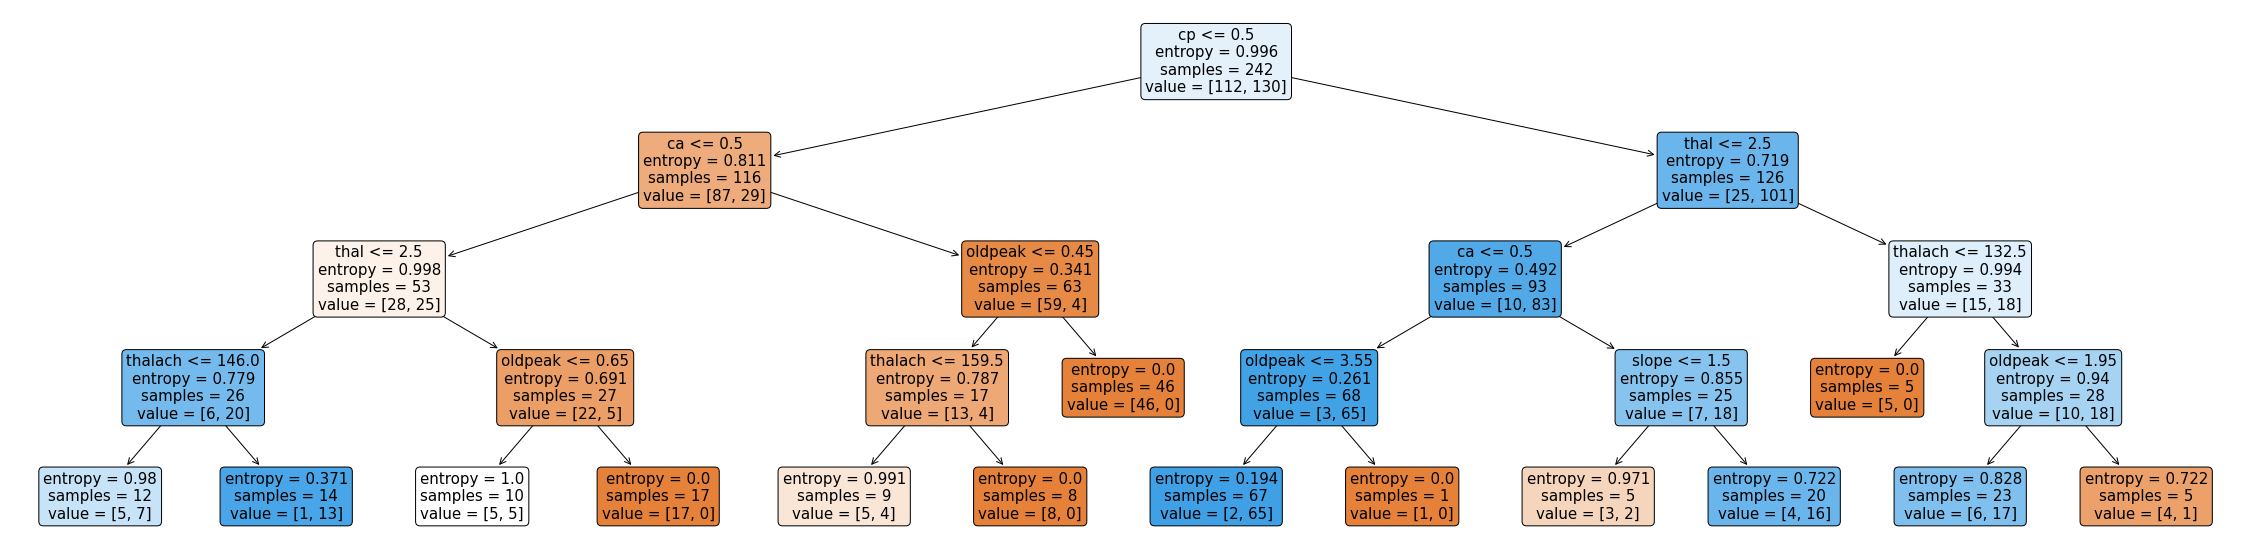

In [60]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[40,10])
tree.plot_tree(dt,filled=True,fontsize=15,rounded=True,feature_names=x.columns)
plt.show()

In [61]:
y_pred = dt.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_curve,precision_score,roc_auc_score
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[18,  8],
       [ 3, 32]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

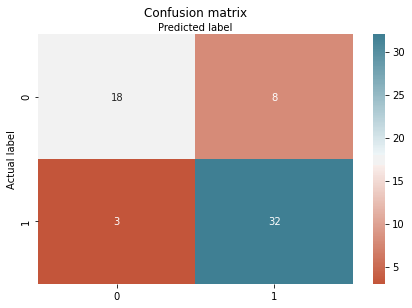

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = sns.diverging_palette(20, 220, n=200) ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        26
           1       0.80      0.91      0.85        35

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



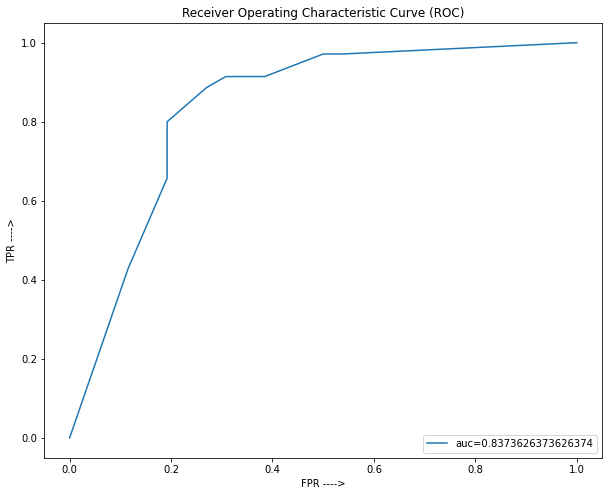

In [65]:
# ROC and AUC
from sklearn import metrics
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [70]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [69]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt, x, y,
                target_name="target",
                feature_names=df.feature_names)

ModuleNotFoundError: No module named 'dtreeviz'

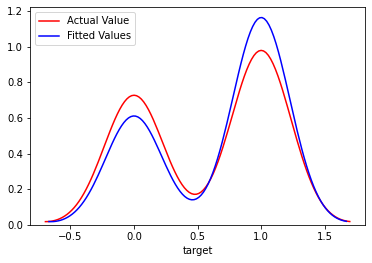

In [71]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)